### Лабораторна робота #1

Імпорт необхідних бібліотек

In [53]:
import matplotlib.pyplot 
import seaborn 
import pandas

Завантаження data-файлів в змінні

In [54]:
movies = pandas.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
ratings = pandas.read_csv(filepath_or_buffer='ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pandas.read_csv(filepath_or_buffer='users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

Merge данних в єдиний dataframe

In [55]:
mergedList = pandas.merge(pandas.merge(ratings, users, on='UserID'), movies, on='MovieID')

mergedList

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


Вікові категорії користувачів

In [56]:
ageGroupList=[1,18,25,35,45,50,56]

Функція повертаюча топ 10 фільмів для вказаної вікової категорії за всіми віковими групами

In [57]:
def RatingByAgeForGender(data, gender):
    resultRating = {}

    genderData = data[data['Gender'] == gender]

    for index, ageGroup in enumerate(ageGroupList):

        genderDataForAge = genderData[genderData["Age"] == ageGroup]
        ratingCount = genderDataForAge.groupby(['MovieID'])['Rating'].count()
        filterMovieIds = ratingCount[ratingCount >= 20].index.tolist()
        filterData = genderDataForAge[genderDataForAge['MovieID'].isin(filterMovieIds)]
        rating = filterData.groupby(['Title'])['Rating'].mean().nlargest(10).reset_index()
        
        resultRating[f'{ageGroupList[index]}'] = rating
    return resultRating

Виклик функції

In [58]:
genderAgeRating = RatingByAgeForGender(mergedList, 'M')
genderAgeRating

{'1':                               Title    Rating
 0                 GoodFellas (1990)  4.863636
 1             Apocalypse Now (1979)  4.727273
 2            American Beauty (1999)  4.629032
 3             Godfather, The (1972)  4.589744
 4                 Annie Hall (1977)  4.571429
 5  Shawshank Redemption, The (1994)  4.545455
 6          Full Metal Jacket (1987)  4.523810
 7   Ferris Bueller's Day Off (1986)  4.500000
 8                Matrix, The (1999)  4.487805
 9               Shining, The (1980)  4.476190,
 '18':                                                Title    Rating
 0                         Usual Suspects, The (1995)  4.700658
 1                   Shawshank Redemption, The (1994)  4.699708
 2  Seven Samurai (The Magnificent Seven) (Shichin...  4.635135
 3                              Godfather, The (1972)  4.570470
 4                              Close Shave, A (1995)  4.550562
 5                             American Beauty (1999)  4.540643
 6                     

Візуалізація рейтингу

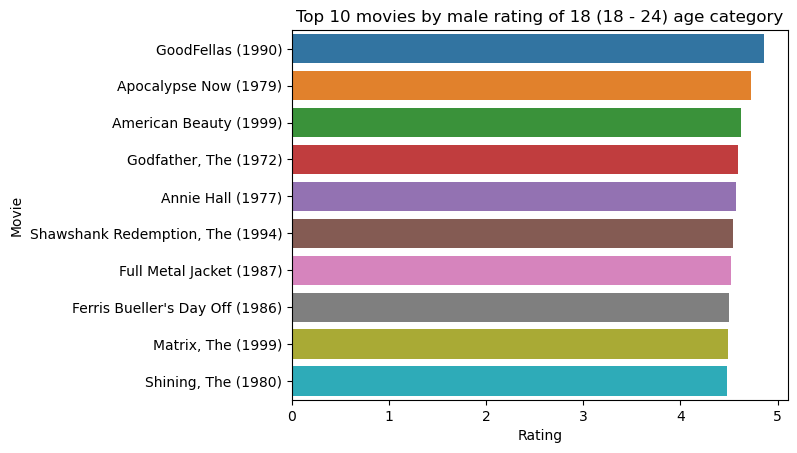

In [59]:
matplotlib.pyplot.figure()
seaborn.barplot(data=genderAgeRating['1'], x='Rating', y='Title', orient='h')
matplotlib.pyplot.xlabel('Rating')
matplotlib.pyplot.ylabel('Movie')
matplotlib.pyplot.title('Top 10 movies by male rating of 18 (18 - 24) age category')
matplotlib.pyplot.show()